# Bike Sharing Assignment

## Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 



In [1]:
# Importing the required packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

## Reading, Understanding and Visualising the dataset:

In [2]:
# Reading the data from day.csv file provided 
bikes_df = pd.read_csv('day.csv')

# Visualising the columns
bikes_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
# Checking the shape of the data
bikes_df.shape

(730, 16)

So the data has 16 columns(of categorical and continous type data) with 730 entries

In [4]:
# Checking if there are any null values in all the 16 columns
bikes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


As observed, there are no null values in any column and the datatypes of the respective columns are of expected type

In [5]:
# Checking the columns in case of any abnormal data
bikes_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Dropping columns that are not required for analysis:

- Instant: As it is used just for indexing and doesnot have statistical importance.

- dteday: As we have month and year as seperate columns and important aspects required for analysis are already determined in the columns 'holiday', 'weekday' etc.,

- casual, registered: As the total count of users is already available in 'cnt' column and the individual counts are not significant on test data.

- atemp - As data in 'temp' column is more accurate and there is high correlation between 'temp' and 'atemp' columns.


In [6]:
# Dropping the above columns
bikes_df = bikes_df.drop(['instant', 'dteday', 'casual', 'registered', 'atemp'], axis=1)

#Checking the columns
bikes_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


Categorical columns in the data:
1. season
2. yr
3. mnth
4. holiday
5. weekday
6. workingday
7. weathersit

Numerical columns:
1. temp
2. hum
3. windspeed
4. cnt [target variable]

### 1. Visualising the data of numeric columns:

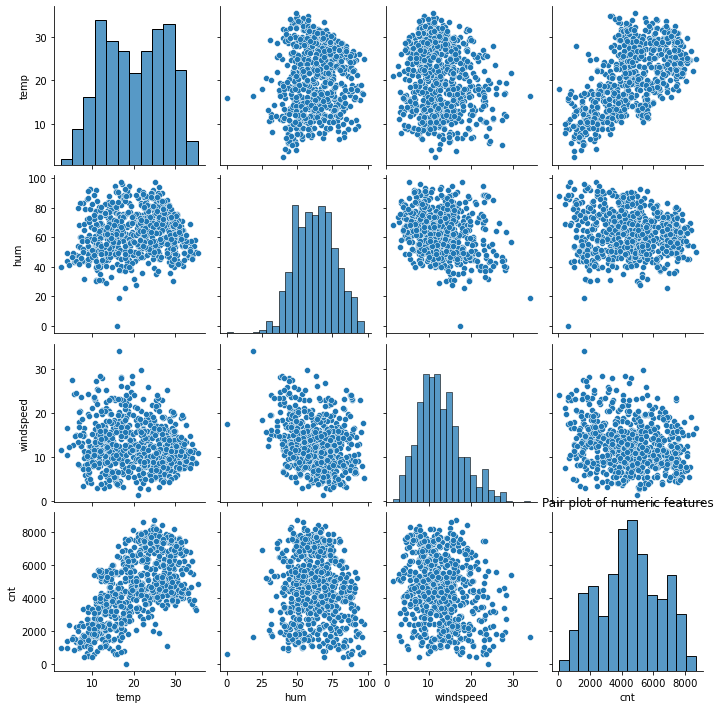

In [7]:
# Visualising the numeric columns
sns.pairplot(bikes_df[['temp','hum', 'windspeed', 'cnt']])
plt.title('Pair plot of numeric features')
plt.show()

Clearly, 'cnt' column has some linearity with the other variables

### 2. Visualising the categorical columns

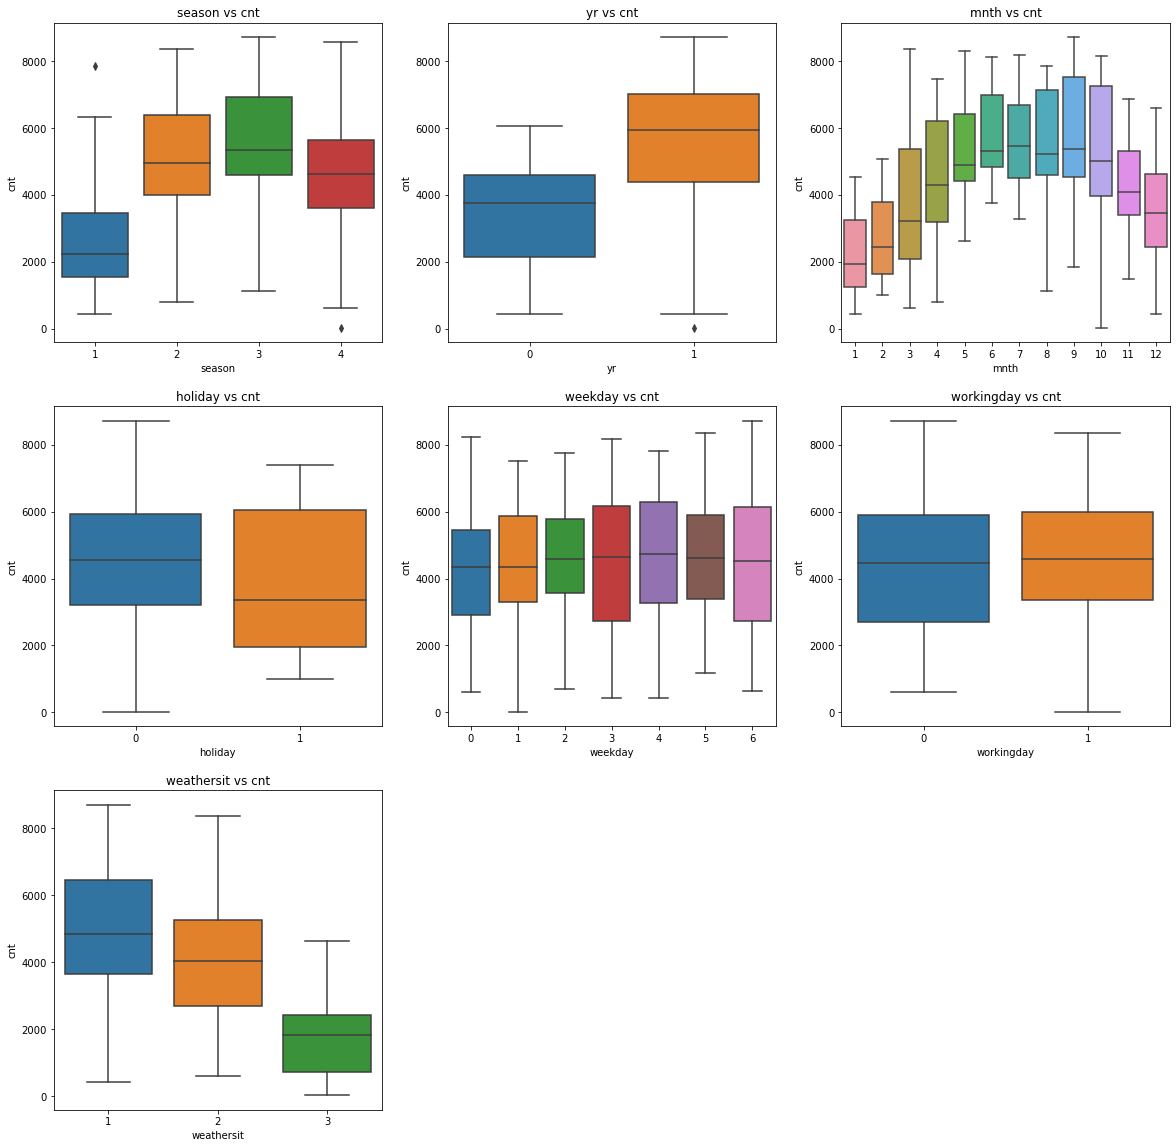

In [8]:
# Visualising the categorical data using boxplots

plt.figure(figsize=(20,20))

# season vs cnt
plt.subplot(3,3,1)
sns.boxplot(x='season', y='cnt', data=bikes_df)
plt.title('season vs cnt')

# yr vs cnt
plt.subplot(3,3,2)
sns.boxplot(x='yr', y='cnt', data=bikes_df)
plt.title('yr vs cnt')

# mnth vs cnt
plt.subplot(3,3,3)
sns.boxplot(x='mnth', y='cnt', data=bikes_df)
plt.title('mnth vs cnt')

# holiday vs cnt
plt.subplot(3,3,4)
sns.boxplot(x='holiday', y='cnt', data=bikes_df)
plt.title('holiday vs cnt')

# weekday vs cnt
plt.subplot(3,3,5)
sns.boxplot(x='weekday', y='cnt', data=bikes_df)
plt.title('weekday vs cnt')

# workingday vs cnt
plt.subplot(3,3,6)
sns.boxplot(x='workingday', y='cnt', data=bikes_df)
plt.title('workingday vs cnt')

# weathersit vs cnt
plt.subplot(3,3,7)
sns.boxplot(x='weathersit', y='cnt', data=bikes_df)
plt.title('weathersit vs cnt')

plt.show()

Inferences:

- season vs cnt:
The number of rides taken are the highest in fall, but has seen a significant dip in Spring

- yr vs cnt:
The number of bikes taken are increased in 2019 compared to 2018

- mnth vs cnt:
The number of bikes taken are increasing from January to july and then constantly decreasing to the year-end. Less bikes are taken in the starting months of the year.

- holiday vs cnt:
Lesser bikes are booked on holidays

- weekday vs cnt:
Above 4000 bikes are booked on all the weekdays 

- workingday vs cnt:
Almost the same number of bikes are rented on both working-day and weekends/holidays

- weathersit vs cnt:
No bikes are booked when there is heavy rain type of weather. There is a severe dip in bikes rented when there is light snow/rain type of weather.
Most rides are booked when the weather is clear.


## Data Preparation

#### Encoding with dummy variables

The categorical variables are given with label encoding, converting it to one-hot encoding wherever required to avoid misintereptions in data.

Categorical columns in the data:
1. season
2. yr
3. mnth
4. holiday
5. weekday
6. workingday
7. weathersit

Excluding workingday, holiday and yr columns
Considering weather type,
- Clear, Few clouds, Partly cloudy, Partly cloudy as 'Clear'
- Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist as 'Misty'
- Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds as 'Bad'
- Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog as 'Severe'

In [9]:
#Convert the data in categorical columns to string types
bikes_df.season.replace({1:"Spring", 2:"Summer", 3:"Fall", 4:"Winter"},inplace = True)

bikes_df.weathersit.replace({1:'Clear',2:'Misty',3:'Bad',4:'Severe'},inplace = True)

bikes_df.mnth = bikes_df.mnth.replace({1: 'Jan',2: 'Feb',3: 'Mar',4: 'Apr',5: 'May',6: 'Jun',
                  7: 'Jul',8: 'Aug',9: 'Sept',10: 'Oct',11: 'Nov',12: 'Dec'})

bikes_df.weekday = bikes_df.weekday.replace({0: 'Sun',1: 'Mon',2: 'Tue',3: 'Wed',4: 'Thu',5: 'Fri',6: 'Sat'})
bikes_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,Spring,0,Jan,0,Sat,0,Misty,14.110847,80.5833,10.749882,985
1,Spring,0,Jan,0,Sun,0,Misty,14.902598,69.6087,16.652113,801
2,Spring,0,Jan,0,Mon,1,Clear,8.050924,43.7273,16.636703,1349
3,Spring,0,Jan,0,Tue,1,Clear,8.200000,59.0435,10.739832,1562
4,Spring,0,Jan,0,Wed,1,Clear,9.305237,43.6957,12.522300,1600


In [10]:
#Visualising season column
bikes_df.season.value_counts()

Fall      188
Summer    184
Spring    180
Winter    178
Name: season, dtype: int64

Performing One hot encoding on 'season' column

In [11]:
#Getting dummy variables for the columns
bikes_df = pd.get_dummies(data=bikes_df,columns=["season","mnth","weekday","weathersit"],drop_first=True)

In [12]:
#Visualising the data
bikes_df.head()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Clear,weathersit_Misty
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,...,0,0,1,0,0,0,0,0,1,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,0,1,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,1,1,0


In [13]:
#Checking the columns before modelling
bikes_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Clear', 'weathersit_Misty'],
      dtype='object')

In [14]:
#Checking new shape of the dataset
bikes_df.shape

(730, 29)

## Train - Test Split:

In [15]:
# Using a 70-30 split to the data
df_train, df_test = train_test_split(bikes_df, train_size = 0.7, random_state = 100)

#Checking the data and also the shape
df_train

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Clear,weathersit_Misty
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,0,1,0,1,0
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,48.3333,23.500518,1796,1,0,0,...,0,0,0,0,1,0,0,0,1,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,13.803347,72.9583,14.707907,1683,0,1,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,1,30.852500,65.9583,8.666718,7261,0,0,0,...,0,0,0,0,0,1,0,0,1,0
53,0,0,1,9.091299,42.3043,6.305571,1917,1,0,0,...,0,0,0,0,0,0,0,1,1,0
350,0,0,0,10.591653,56.0833,16.292189,2739,0,0,1,...,0,0,0,1,0,0,0,0,0,1
79,0,0,1,17.647835,73.7391,19.348461,2077,0,1,0,...,0,0,1,0,0,0,0,0,0,1


## Rescaling:

In [16]:
#Checking the data before rescaling
df_train.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Clear,weathersit_Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,20.108257,63.123710,12.834912,4485.337255,0.243137,0.247059,0.247059,...,0.084314,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.625490,0.345098
std,0.500429,0.157763,0.468282,7.431626,14.153170,5.292031,1950.666077,0.429398,0.431725,0.431725,...,0.278131,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.484471,0.475867
min,0.000000,0.000000,0.000000,2.424346,0.000000,2.834381,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,13.606865,52.270825,9.041918,3120.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,20.277923,63.437500,12.083182,4530.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,26.615847,73.250025,15.750879,5973.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,35.328347,97.041700,34.000021,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
#Initialising an object of MinMaxScaler
scaler = MinMaxScaler()

#Apply MinMaxScaler to all the numeric columns
num_vars = ['temp', 'hum', 'windspeed', 'cnt']


df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [18]:
#Checking the data after rescaling
df_train[num_vars].describe()

,temp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.650480,0.320883,0.513499
std,0.225858,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.538643,0.199179,0.356420
50%,0.542596,0.653714,0.296763,0.518638
75%,0.735215,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000


After MinMaxScaling, the minimum value is 0 and maximum value is 1 in all the numeric columns

## Checking Collinearity:

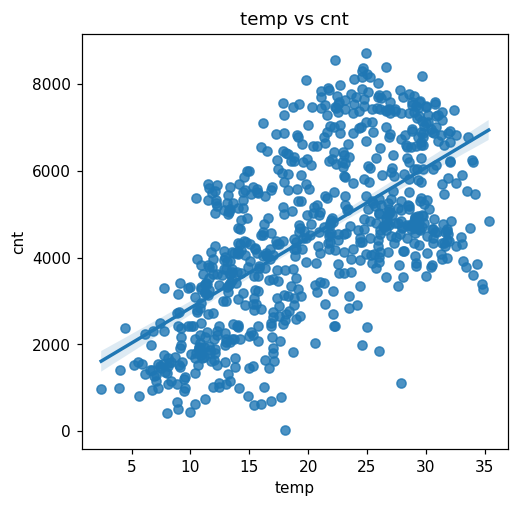

In [19]:
# Plotting temp vs cnt
plt.figure(figsize=(5,5), dpi=110)
sns.regplot(data=bikes_df,x="temp",y="cnt")
plt.title('temp vs cnt')
plt.show()

- There is a clear positive linearity between temperature and bikes

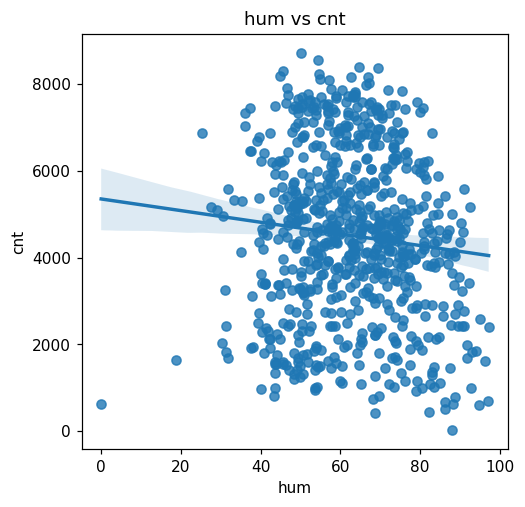

In [20]:
# Plotting hum vs cnt
plt.figure(figsize=(5,5), dpi=110)
sns.regplot(data=bikes_df,x="hum",y="cnt")
plt.title('hum vs cnt')
plt.show()

- Although there is no clear relation for humidity like temperature, some negative linearity can be inferred

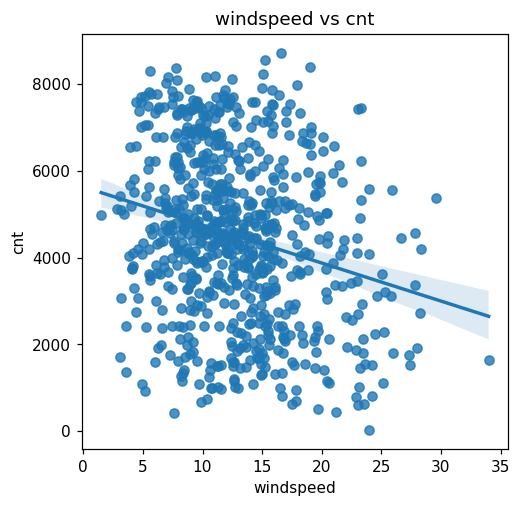

In [21]:
# Plotting windspeed vs cnt
plt.figure(figsize=(5,5), dpi=110)
sns.regplot(data=bikes_df,x="windspeed",y="cnt")
plt.title('windspeed vs cnt')
plt.show()

- Windspeed also has negative linearity but the values are scattered similar to humidity

#### Plotting heatmaps

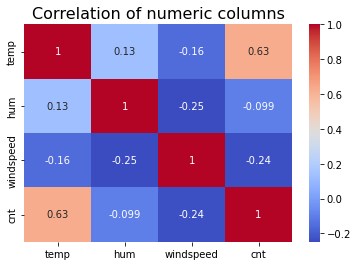

In [22]:
# Heatmap on the numeric variables including the target variable 'cnt'
plt.title("Correlation of numeric columns",fontsize=16)
sns.heatmap(bikes_df[num_vars].corr(),annot= True,cmap='coolwarm')
plt.show()

From the heatmap, it checksout, temperature is highly correlated with the target variable 'cnt'

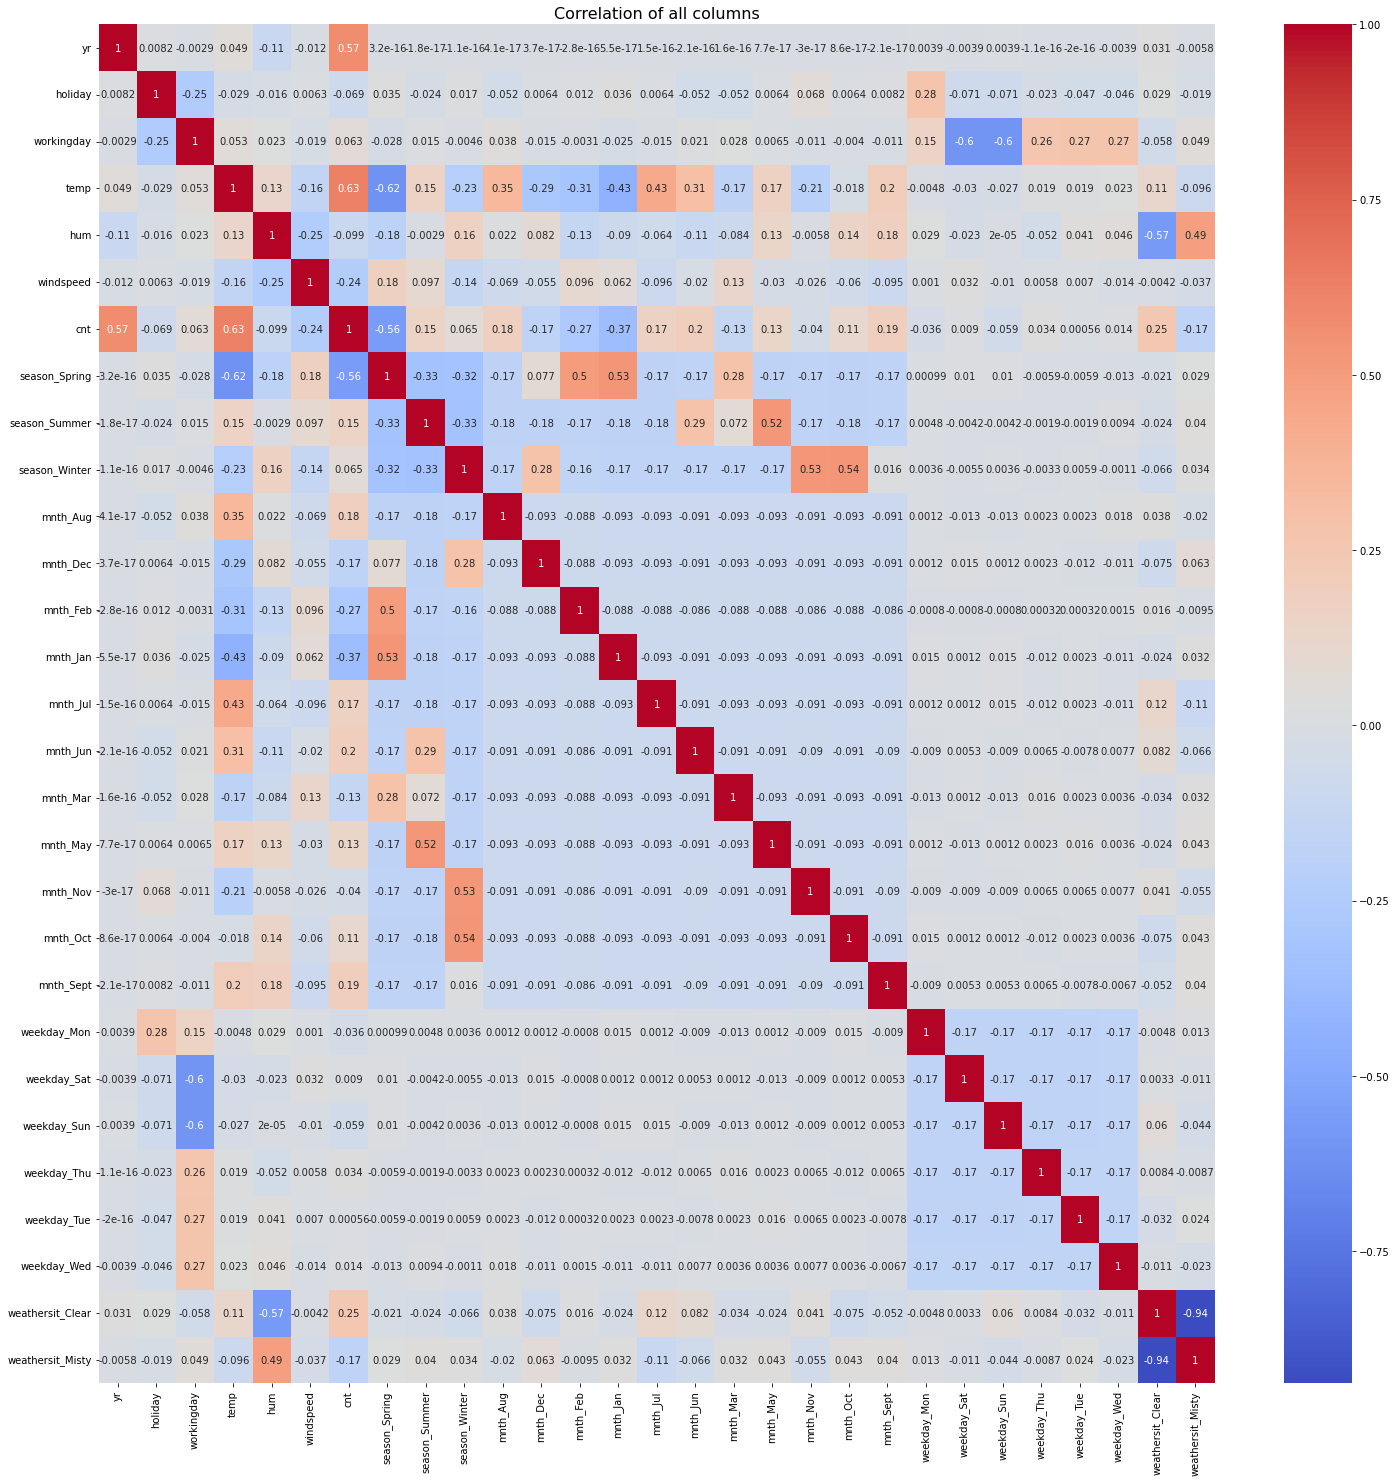

In [23]:
#Heatmap on all the variables
plt.figure(figsize=(25,25))
plt.title("Correlation of all columns",fontsize=16)
sns.heatmap(bikes_df.corr(),annot= True,cmap='coolwarm')
plt.show()

Other than temperature, year has the highest positive correlation with cnt 
And season_spring has the highest negative correlation with cnt

## Building the model:

In [24]:
# Splitting the training dataset, 'df_train' into X_train and y_train.
y_train = df_train.pop('cnt')

# All other features except 'cnt' are included in X-train
X_train = df_train

#### Using RFE approach first to eliminate some columns and then going with manual selection on the filtered columns

In [25]:
bikes_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'cnt',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Aug',
       'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Clear', 'weathersit_Misty'],
      dtype='object')

Choosing the top 15 columns for the model using RFE:

In [26]:
# Initialising linear model from sklearn
lm = LinearRegression()

# Performing fit
lm.fit(X_train, y_train)

LinearRegression()

In [27]:
# Picking the top 15 features using RFE
rfe = RFE(lm, 15)
rfe = rfe.fit(X_train, y_train)

In [28]:
# Display the ranks and states of selected features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 6),
 ('mnth_Dec', False, 3),
 ('mnth_Feb', False, 4),
 ('mnth_Jan', True, 1),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 13),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 5),
 ('mnth_Nov', False, 2),
 ('mnth_Oct', False, 12),
 ('mnth_Sept', True, 1),
 ('weekday_Mon', False, 8),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', False, 7),
 ('weekday_Thu', False, 10),
 ('weekday_Tue', False, 9),
 ('weekday_Wed', False, 11),
 ('weathersit_Clear', True, 1),
 ('weathersit_Misty', True, 1)]

In [29]:
# Storing the columns resulted by RFE approach
col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jan',
       'mnth_Jul', 'mnth_Sept', 'weekday_Sat', 'weathersit_Clear',
       'weathersit_Misty'],
      dtype='object')


In [30]:
# Columns that are omitted by RFE approach
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jun', 'mnth_Mar', 'mnth_May',
       'mnth_Nov', 'mnth_Oct', 'weekday_Mon', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed'],
      dtype='object')

None of the omitted columns have strong relation with the target variable. So, proceeding further

In [31]:
# Updating X_train with the columns selected by the RFE approach
X_train_lm = X_train[col]

#Adding constant
X_train_rfe = sm.add_constant(X_train_lm)

#Running the linear model
lmA = sm.OLS(y_train,X_train_rfe).fit()

#Viewing OLS regression results
print(lmA.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 11 May 2022   Prob (F-statistic):          4.22e-191
Time:                        23:30:25   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0044      0.048  

- The model explains around 84% of the variance of data
- All the features have p-value/significance less than 5%

In [32]:
# Calculating VIF
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,25.63
3,temp,22.84
13,weathersit_Clear,14.80
14,weathersit_Misty,9.07
6,season_Spring,5.69
2,workingday,5.42
5,windspeed,4.69
8,season_Winter,4.12
7,season_Summer,3.21
0,yr,2.10


- As none of the p-values are greater than 0.05, removing the 'humidity' column which has high VIF(>5) and re-building the model

In [33]:
#Removing column due to high VIF
X_train_lm.drop('hum', axis=1, inplace=True)

#Adding constant
X_train_rfe = sm.add_constant(X_train_lm)

#Running the linear model
lmB = sm.OLS(y_train,X_train_rfe).fit()

#Viewing OLS regression results
print(lmB.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 11 May 2022   Prob (F-statistic):          1.60e-188
Time:                        23:30:25   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1171      0.039  

- Without 'humidity' the model still explains 84% of the variance.
- None of the variables have p-value greater than 0.05

In [34]:
# Calculating VIF
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,weathersit_Clear,14.79
3,temp,13.96
13,weathersit_Misty,8.48
2,workingday,5.34
4,windspeed,4.67
5,season_Spring,4.48
6,season_Summer,2.79
7,season_Winter,2.74
0,yr,2.08
11,weekday_Sat,1.99


- As none of the p-values are greater than 0.05, removing the 'weathersit_Clear' column which has high VIF(>5) and re-building the model

In [35]:
#Removing column due to high VIF
X_train_lm.drop('weathersit_Clear', axis=1, inplace=True)

#Adding constant
X_train_rfe = sm.add_constant(X_train_lm)

#Running the linear model
lmC = sm.OLS(y_train,X_train_rfe).fit()

#Viewing OLS regression results
print(lmC.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.792
Method:                 Least Squares   F-statistic:                     150.1
Date:                Wed, 11 May 2022   Prob (F-statistic):          2.07e-162
Time:                        23:30:26   Log-Likelihood:                 445.86
No. Observations:                 510   AIC:                            -863.7
Df Residuals:                     496   BIC:                            -804.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1652      0.036  

- P-value of holiday is greater than 5, so dropping it
- 79% variance is explained by the model

In [36]:
# Calculating VIF
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,7.06
2,workingday,5.22
4,windspeed,4.62
5,season_Spring,3.07
6,season_Summer,2.34
0,yr,2.07
7,season_Winter,1.96
11,weekday_Sat,1.96
8,mnth_Jan,1.62
9,mnth_Jul,1.59


In [37]:
#Removing column due to high p-value
X_train_lm.drop('holiday', axis=1, inplace=True)

#Adding constant
X_train_rfe = sm.add_constant(X_train_lm)

#Running the linear model
lmD = sm.OLS(y_train,X_train_rfe).fit()

#Viewing OLS regression results
print(lmD.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     161.9
Date:                Wed, 11 May 2022   Prob (F-statistic):          5.27e-163
Time:                        23:30:26   Log-Likelihood:                 444.62
No. Observations:                 510   AIC:                            -863.2
Df Residuals:                     497   BIC:                            -808.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1584      0.035  

In [38]:
# Calculating VIF
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.81
1,workingday,4.66
3,windspeed,4.61
4,season_Spring,2.99
5,season_Summer,2.33
0,yr,2.07
6,season_Winter,1.90
10,weekday_Sat,1.83
7,mnth_Jan,1.62
8,mnth_Jul,1.59


- mnth_Jan has a p-value greater than 5, dropping it
- The model still explains 79% variance

In [39]:
#Removing column due to high p-value
X_train_lm.drop('mnth_Jan', axis=1, inplace=True)

#Adding constant
X_train_rfe = sm.add_constant(X_train_lm)

#Running the linear model
lmE = sm.OLS(y_train,X_train_rfe).fit()

#Viewing OLS regression results
print(lmE.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.791
Method:                 Least Squares   F-statistic:                     175.6
Date:                Wed, 11 May 2022   Prob (F-statistic):          1.73e-163
Time:                        23:30:26   Log-Likelihood:                 443.08
No. Observations:                 510   AIC:                            -862.2
Df Residuals:                     498   BIC:                            -811.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.1440      0.035  

In [40]:
# Calculating VIF
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.72
1,workingday,4.63
3,windspeed,4.59
4,season_Spring,2.38
5,season_Summer,2.32
0,yr,2.06
6,season_Winter,1.90
9,weekday_Sat,1.82
7,mnth_Jul,1.58
10,weathersit_Misty,1.54


- P-value of all the features are below 0.5, but VIF of temp is greater than 5. So dropping it

In [41]:
#Removing column due to high p-value
X_train_lm.drop('temp', axis=1, inplace=True)

#Adding constant
X_train_rfe = sm.add_constant(X_train_lm)

#Running the linear model
lmF = sm.OLS(y_train,X_train_rfe).fit()

#Viewing OLS regression results
print(lmF.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     127.6
Date:                Wed, 11 May 2022   Prob (F-statistic):          1.41e-130
Time:                        23:30:27   Log-Likelihood:                 362.50
No. Observations:                 510   AIC:                            -703.0
Df Residuals:                     499   BIC:                            -656.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5380      0.022  

In [42]:
# Calculating VIF
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,4.12
1,workingday,3.53
4,season_Summer,2.26
3,season_Spring,2.25
0,yr,1.90
5,season_Winter,1.90
8,weekday_Sat,1.61
9,weathersit_Misty,1.53
6,mnth_Jul,1.29
7,mnth_Sept,1.22


- mnth_Jul has p-value greater than 0.05, dropping it

In [43]:
#Removing column due to high p-value
X_train_lm.drop('mnth_Jul', axis=1, inplace=True)

#Adding constant
X_train_rfe = sm.add_constant(X_train_lm)

#Running the linear model
lmG = sm.OLS(y_train,X_train_rfe).fit()

#Viewing OLS regression results
print(lmG.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.719
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     142.0
Date:                Wed, 11 May 2022   Prob (F-statistic):          1.28e-131
Time:                        23:30:27   Log-Likelihood:                 362.39
No. Observations:                 510   AIC:                            -704.8
Df Residuals:                     500   BIC:                            -662.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5337      0.020  

In [44]:
# Calculating VIF
vif = pd.DataFrame()
vif['Features'] = X_train_lm.columns
vif['VIF'] = [variance_inflation_factor(X_train_lm.values, i) for i in range(X_train_lm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,windspeed,3.95
1,workingday,3.28
3,season_Spring,2.00
4,season_Summer,2.00
0,yr,1.87
5,season_Winter,1.71
7,weekday_Sat,1.55
8,weathersit_Misty,1.53
6,mnth_Sept,1.18


### Now, none of the features used in the model have p-value greater than 0.05 and VIF greater than 5.


#### The model is able to explain 72% of the variance of data. 
As the above condition is satisfied, all the β-coefficients are not equal to zero. 

## Residual Analysis:

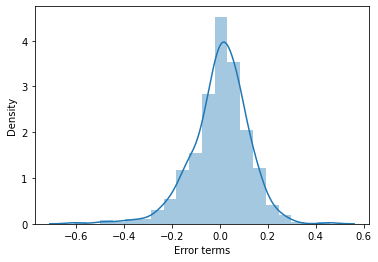

In [45]:
#Checking if the error terms are normally distributed
y_train_pred = lmG.predict(X_train_rfe)

#Plotting the error terms
sns.distplot((y_train - y_train_pred), bins = 20)
plt.xlabel('Error terms')
plt.show()

#### From the plot, mean = 0, and the figure approximates nomal distribution

## Homoscedasticity:

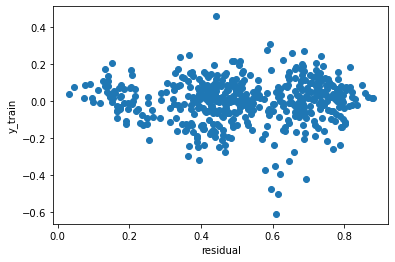

In [46]:
residual = y_train-y_train_pred
plt.scatter(y_train_pred, residual)
plt.ylabel("y_train")
plt.xlabel("residual")
plt.show()

The residuals are scattered and there is no pattern observed

In [47]:
#Checking the left over columns in the model
X_train_lm.columns

Index(['yr', 'workingday', 'windspeed', 'season_Spring', 'season_Summer',
       'season_Winter', 'mnth_Sept', 'weekday_Sat', 'weathersit_Misty'],
      dtype='object')

## Model Predictions:

### Preparing data before predictions

In [48]:
#Applying scaler on the test set
df_test[num_vars] = scaler.transform(df_test[num_vars])

#Checking the test data
df_test.describe()

,yr,holiday,workingday,temp,hum,windspeed,cnt,season_Spring,season_Summer,season_Winter,...,mnth_Oct,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Clear,weathersit_Misty
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.638221,0.313293,0.522154,0.254545,0.263636,0.236364,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.654545,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.148694,0.159584,0.219163,0.436599,0.441609,0.425817,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.476601,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.529197,0.198843,0.378595,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.625590,0.300126,0.524678,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.743798,0.402718,0.677750,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


All the values are normalised.

In [49]:
#Preparing x_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [50]:
#Using the same columns available in the training data
test_cols = ['yr', 'workingday', 'windspeed', 'season_Spring', 'season_Summer','season_Winter', 'mnth_Sept', 'weekday_Sat', 'weathersit_Misty']

In [51]:
#Preparing test data similar to the training data
X_test_lm = X_test[test_cols]

# Adding a constant variable 
X_test_lm = sm.add_constant(X_test_lm)

#Predictions on the test set
y_pred = lmG.predict(X_test_lm)

In [52]:
# Evaluating the model using R-square value
# r-square value
r2_score(y_test, y_pred)

0.7091584951775424

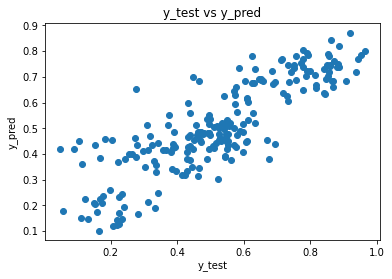

In [53]:
# Visualising the relationship
plt.scatter(y_test, y_pred)
# Plot heading 
plt.title('y_test vs y_pred')  
plt.xlabel('y_test')   
plt.ylabel('y_pred')      
plt.show()

Clearly, there is a linear relationship between y_test and y_pred

### We can observe a 0.71 R-Squared value in test set which is quite similar to the R-squared value on training set(0.72)

# Conclusions:

#### This model explains around 72% of the variance in the data when the target variable is the count of total rental bikes

#### The 9 factors on which the model is dependent to predict the demand for shared bikes:
1. Year
2. Working day
3. Windspeed
4. Spring Season
5. Summer season
6. Winter Season
7. September month
8. Saturday
9. Weather condition type (Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist)

#### The relationship with which the features are dependent and the equation of the model is:
Y = b0 + b1X1 + b2X2 + b3X3 .. + bpXp

Count of total rental bikes = 0.5337 + (yr * 0.2536) + (0.0478 * workingday) + (0.0632 * mnth_Sept) + (0.0551 * weekday_Sat) - (0.2034 * windspeed) - (0.2948 * season_Spring) - (0.0391 * season_Summer) - (0.0887 * season_Winter) - (0.0766 * weathersit_Misty)


# Inferences:

Less number of rental bikes to be taken is most possible
- When there is a bit of windspeed 
- During Spring season
- A bit in summer and winter seasons
- When the weather contition is Misty

Boom bikes may have to focus on more attractive offers during the above conditions to increase the probability of taking a rented ride.